In [1]:
import tensorflow as tf
import keras
import os
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tf.__version__

'2.12.0'

In [3]:
train_data_path = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/'
test_data_path = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/'

In [4]:
data = []
for fold in os.listdir(train_data_path):
    for im in os.listdir(train_data_path + fold):
        img = cv2.imread(train_data_path + fold + "/" + im)
        img = cv2.resize(img, (32, 32))
        data.append([img, fold])

In [5]:
for fold in os.listdir(test_data_path):
    for im in os.listdir(test_data_path + fold):
        img = cv2.imread(test_data_path + fold + "/" + im)
        img = cv2.resize(img, (32, 32))
        data.append([img, fold])

In [6]:
import random 
random.seed(20)
random.shuffle(data)

In [7]:
X,y = [], []
for e in data:
    X.append(e[0])
    y.append(e[1])

In [8]:
from sklearn.preprocessing import OneHotEncoder
X = np.array(X)
y = np.array(y)
y = y.reshape(len(y), 1)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y)
y = enc.transform(y).toarray()

In [9]:
print(X.shape)
print(y.shape)

(6400, 32, 32, 3)
(6400, 4)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)
# print(tf.config.list_physical_devices('GPU'))

In [12]:
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    validation_split = 0.2,
#                                    rotation_range=5,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    horizontal_flip=True,
#                                    vertical_flip = True,
#                                    fill_mode='nearest')
# valid_datagen = ImageDataGenerator(rescale = 1./255,
#                                   validation_split = 0.2)
# test_datagen = ImageDataGenerator(rescale = 1./255)


In [13]:
# validation_set = train_datagen.flow_from_directory(directory=train_data_path,
#                                                   target_size= (331, 331),
#                                                   batch_size = 64,
#                                                   class_mode = 'categorical',
#                                                   subset = 'validation')

In [14]:
# test_set = train_datagen.flow_from_directory(directory=test_data_path,
#                                                   target_size= (331, 331),
#                                                   batch_size = 64,
#                                                   class_mode = 'categorical',
#                                                   )

Found 5121 files belonging to 4 classes.


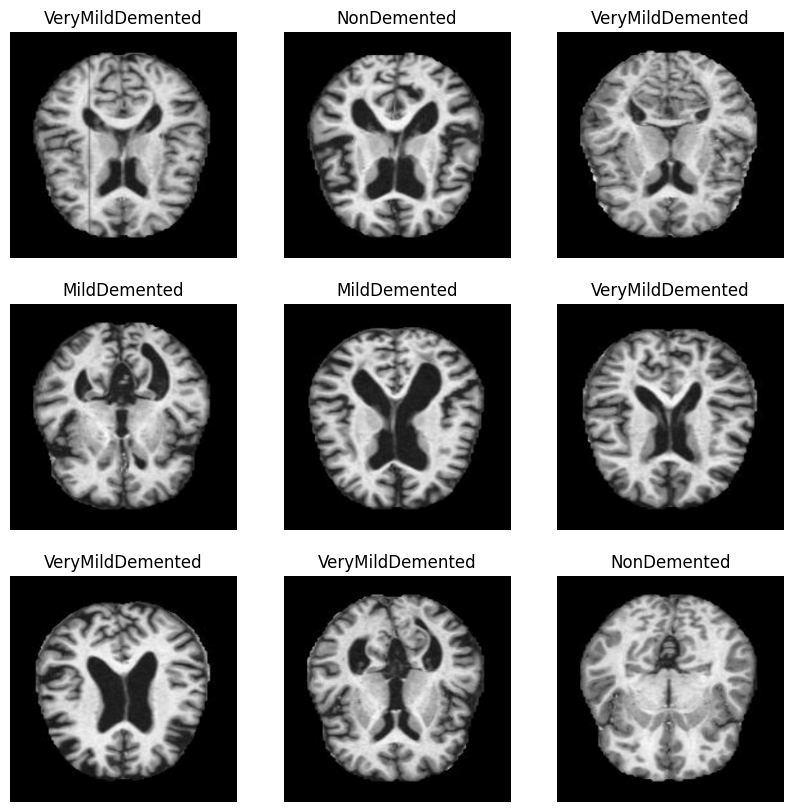

In [15]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder_paths = ["/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented", 
                "/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented",
                "/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented",
                "/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/VeryMildDemented"]

train_dataset = tf.keras.utils.image_dataset_from_directory('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train')
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
# base_model = tf.keras.applications.NASNetLarge(weights = 'imagenet', include_top = False, input_shape = (331, 331, 3))

In [17]:
# for layer in base_model.layers[:-3]:
#     layer.trainable = False

In [18]:
# cnn  = Sequential()
# cnn.add(base_model)
# cnn.add(Flatten())
# cnn.add(BatchNormalization())
# cnn.add(Dense(32, activation = 'relu'))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.5))
# cnn.add(Dense(32, activation = 'relu'))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.5))
# cnn.add(Dense(32, activation = 'relu'))
# cnn.add(BatchNormalization())
# cnn.add(Dropout(0.5))

# cnn.add(Dense(4, activation = 'softmax'))

model=Sequential()
model.add(Conv2D(filters = 64, kernel_size = 4, activation = 'relu', input_shape = [32, 32, 3], padding = 'same'))
model.add(MaxPool2D(pool_size = 2, strides = 2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = 2, strides = 2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = 2, strides = 2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = 2, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = 2, strides = 2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 256, kernel_size = 2, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = 2, strides = 2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

In [19]:
# # es = EarlyStopping(min_delta = 0.001,
# #                   patience = 5,
# #                   restore_best_weights = True)
# es = EarlyStopping(patience=20, restore_best_weights= True)

In [20]:
# # rlrp = ReduceLROnPlateau(monitor = 'val_loss', patience = 10, factor = 0.3, min_lr = 0.001)
# lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 20,factor = 0.50, min_lr = 1e-10)

In [21]:
# mcp = ModelCheckpoint('model.h5',
#                      save_best_only = True,
#                      monitor = 'val_loss',
#                      mode = 'min',
#                      )

In [22]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 128)         0

In [24]:
# from keras.utils import plot_model
# plot_model(model)

In [25]:
cnn = model.fit(X_train, y_train, epochs = 200, validation_split = 0.2, batch_size = 64, shuffle = True)

Epoch 1/200


2023-10-14 12:34:11.509776: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


64/64 [==============================] - 11s 11ms/step - loss: 2.8672 - accuracy: 0.4221 - val_loss: 1.0965 - val_accuracy: 0.3535
Epoch 2/200
64/64 [==============================] - 0s 7ms/step - loss: 1.0749 - accuracy: 0.4719 - val_loss: 1.1670 - val_accuracy: 0.4961
Epoch 3/200
64/64 [==============================] - 0s 7ms/step - loss: 1.0558 - accuracy: 0.4929 - val_loss: 1.1098 - val_accuracy: 0.4961
Epoch 4/200
64/64 [==============================] - 0s 7ms/step - loss: 1.0441 - accuracy: 0.4897 - val_loss: 1.1184 - val_accuracy: 0.4961
Epoch 5/200
64/64 [==============================] - 0s 7ms/step - loss: 1.0124 - accuracy: 0.5049 - val_loss: 1.2078 - val_accuracy: 0.4238
Epoch 6/200
64/64 [==============================] - 0s 7ms/step - loss: 0.9846 - accuracy: 0.5090 - val_loss: 1.1811 - val_accuracy: 0.3682
Epoch 7/200
64/64 [==============================] - 0s 7ms/step - loss: 0.9818 - accuracy: 0.5054 - val_loss: 1.1124 - val_accuracy: 0.3652
Epoch 8/200
64/64 [====

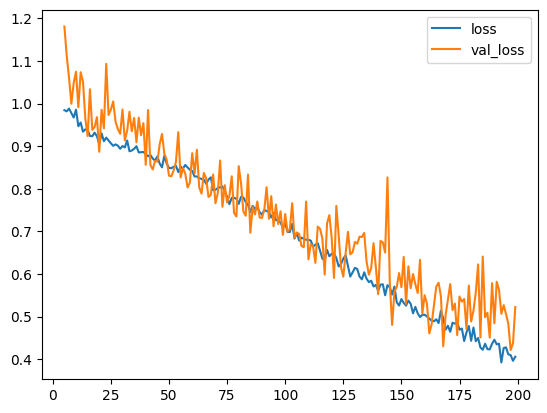

In [26]:
import pandas as pd

history_df = pd.DataFrame(cnn.history)
history_df.loc[5:, ['loss', 'val_loss']].plot();

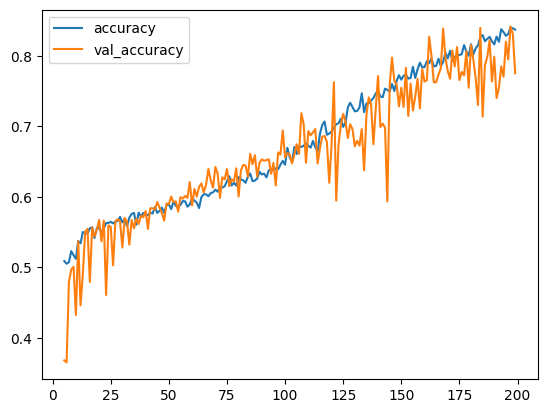

In [27]:
import pandas as pd

history_df = pd.DataFrame(cnn.history)
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot();

In [28]:
loss_and_metrics = model.evaluate(X_test, y_test)
print(f'Test Loss     : {loss_and_metrics[0]}')
print(f'Test Accuracy : {loss_and_metrics[1]}')

40/40 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.7656
Test Loss     : 0.5483501553535461
Test Accuracy : 0.765625


In [29]:
y_pred = model.predict(X_test)
prob = np.argmax(y_pred, axis = 1)

40/40 [==============================] - 0s 2ms/step


In [30]:
print(prob)

[2 2 3 ... 2 2 2]


In [31]:
print(prob[1])

2


In [32]:
model.save('model.hdf5')

In [33]:
!pip install -q streamlit

In [34]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import cv2
from PIL import Image, ImageOps
import numpy as np

@st.cache(allow_output_mutation = True)
def load_model():
    model = tf.keras.models.load_model('model.h5')
    return model
with st.spinner('Model is being loaded...'):
    model = load_model()
st.write("""
        #Alzheimer's Classification
        """
        )
file = st.file_uploader("Upload the image", type = ["jpg", "png"])
st.set_option('deprecation.showfileUploaderEncoding', False)

def upload_predict(upload_image, model):
    size = (180, 180)
    image = ImageOps.fit(upload_image, size, Image.ANTIALIAS)
    image = np.asarray(image)
    imgage = cv2.resize(image, dsize = (32, 32, 3))
    
    prediction = model.predict(image)
    ans = np.argmax(prediction, axis = 1)
    return ans
if file is None:
    st.text("Please upload an image file")
else:
    image  = Image.open(file)
    st.image(image, use_column_width = True)
    predictions = upload_predict(image, model)
    if str(predictions[0] == 0):
        image_class = "MildDemented"
    elif str(predictions[0] == 0):
        image_class = "ModerateDemented"
    elif str(predictions[0] == 0):
        image_class = "NonDemented"
    else:
        image_class = "VeryMildDemented"
    st.write("The image is classified as ", image_class)
    

Writing app.py
